## Hierarchial Agglomerative Clustering
Agglomerative Clustering performed on soil using different linkages and comparison of each output.
<p>
    Dataset consists of component percentages in soil in different places in India.
</p>

In [11]:
#IMPORTS
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [12]:
#loading dataset
soil_data = pd.read_csv('soil.csv')
soil_data

,District,Zn %,Fe%,Cu %,Mn %,B %,S %
0,Anantapur,67.67,65.14,91.88,77.70,73.54,85.90
1,Chittoor,80.51,78.19,99.77,91.82,89.04,88.62
2,East Godavari,79.27,88.14,95.54,97.24,88.05,95.67
3,Guntur,58.30,71.16,98.86,91.40,86.15,86.81
4,Krishna,78.62,82.02,98.05,95.23,65.78,98.56
...,...,...,...,...,...,...,...
668,Birbhum,93.95,100.00,98.63,97.06,78.52,22.07
669,KALIMPONG,100.00,100.00,100.00,84.81,100.00,62.50
670,Maldah,98.56,93.78,97.61,68.60,81.34,44.98
671,Murshidabad,96.36,99.59,100.00,94.31,87.85,36.84


In [13]:
#dropping training examples with missing rows
soil_data.dropna(inplace=True)
soil_data

,District,Zn %,Fe%,Cu %,Mn %,B %,S %
0,Anantapur,67.67,65.14,91.88,77.70,73.54,85.90
1,Chittoor,80.51,78.19,99.77,91.82,89.04,88.62
2,East Godavari,79.27,88.14,95.54,97.24,88.05,95.67
3,Guntur,58.30,71.16,98.86,91.40,86.15,86.81
4,Krishna,78.62,82.02,98.05,95.23,65.78,98.56
...,...,...,...,...,...,...,...
668,Birbhum,93.95,100.00,98.63,97.06,78.52,22.07
669,KALIMPONG,100.00,100.00,100.00,84.81,100.00,62.50
670,Maldah,98.56,93.78,97.61,68.60,81.34,44.98
671,Murshidabad,96.36,99.59,100.00,94.31,87.85,36.84


In [14]:
#dropping district column
soil_data = soil_data.drop('District ', axis=1)
soil_data

,Zn %,Fe%,Cu %,Mn %,B %,S %
0,67.67,65.14,91.88,77.70,73.54,85.90
1,80.51,78.19,99.77,91.82,89.04,88.62
2,79.27,88.14,95.54,97.24,88.05,95.67
3,58.30,71.16,98.86,91.40,86.15,86.81
4,78.62,82.02,98.05,95.23,65.78,98.56
...,...,...,...,...,...,...
668,93.95,100.00,98.63,97.06,78.52,22.07
669,100.00,100.00,100.00,84.81,100.00,62.50
670,98.56,93.78,97.61,68.60,81.34,44.98
671,96.36,99.59,100.00,94.31,87.85,36.84


In [15]:
#selecting 155 random examples
soil_data = soil_data.sample(n=155)
soil_data

,Zn %,Fe%,Cu %,Mn %,B %,S %
575,85.28,98.71,99.70,98.47,88.18,96.29
598,51.64,57.93,88.56,56.93,49.34,47.34
111,39.61,89.64,92.59,95.23,88.53,47.49
90,66.00,80.76,81.41,72.56,0.37,0.16
580,66.72,70.57,98.22,89.27,57.90,78.70
...,...,...,...,...,...,...
255,7.71,0.39,89.42,68.77,9.73,41.34
596,65.40,76.12,94.50,96.62,95.35,59.57
58,88.15,99.68,99.10,96.26,0.39,96.56
330,47.10,63.44,76.94,93.90,57.66,70.49


#### Plotting the dendogram
Dendogram is plotted to show the break line of clustering.

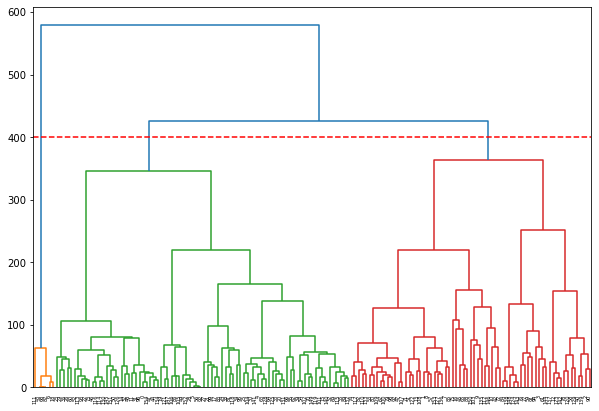

In [16]:
#Drawing the dendogram
plt.figure(figsize=(10, 7)) 
clusters = shc.linkage(soil_data, method = 'ward')
shc.dendrogram(clusters)
plt.axhline(y = 400, color = 'r', linestyle = '--')

#### Performing Agglomerative Clustering using different linkages
Comparison of different linkages using seaborn

Text(0.5, 1.0, 'soil content')

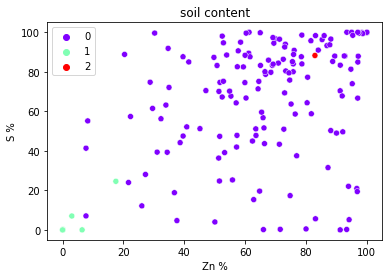

In [39]:
clustering_model_1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
clustering_model_1.fit(soil_data)
data_labels_1 = clustering_model_1.labels_

sns.scatterplot(x='Zn %',y='S %',data=soil_data, hue=data_labels_1, palette='rainbow').set_title('soil content')

Text(0.5, 1.0, 'soil content')

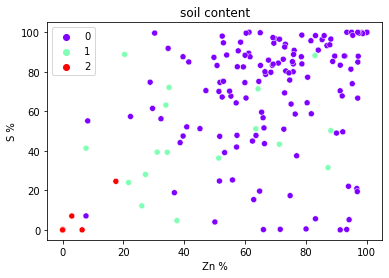

In [40]:
clustering_model_2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clustering_model_2.fit(soil_data)
data_labels_2 = clustering_model_2.labels_

sns.scatterplot(x='Zn %',y='S %', data=soil_data, hue=data_labels_2, palette='rainbow').set_title('soil content')

Text(0.5, 1.0, 'soil content')

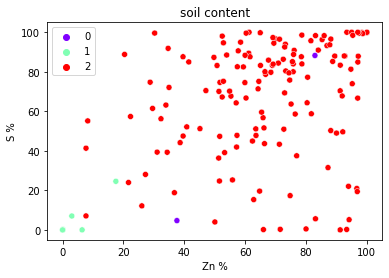

In [41]:
clustering_model_3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
clustering_model_3.fit(soil_data)
data_labels_3 = clustering_model_3.labels_

sns.scatterplot(x='Zn %',y='S %', data=soil_data, hue=data_labels_3, palette='rainbow').set_title('soil content')

Text(0.5, 1.0, 'soil content')

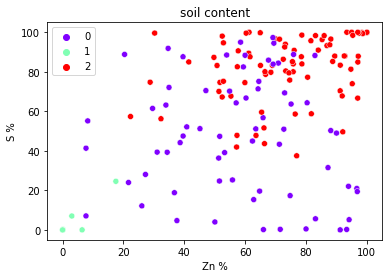

In [42]:
clustering_model_4 = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
clustering_model_4.fit(soil_data)
data_labels_4 = clustering_model_4.labels_

sns.scatterplot(x='Zn %',y='S %', data=soil_data, hue=data_labels_4, palette='rainbow').set_title('soil content')